# Using Pandas and Matplotlib to draw plots and charts - Demo

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Let's plot :-)

### Start with a very simple line plot with just y axis values

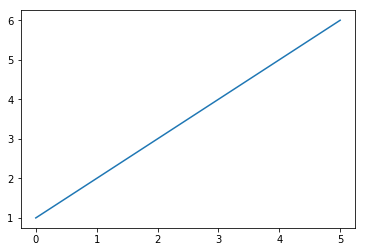

In [23]:
plt.plot([1,2,3,4,5,6])
plt.show();

### Add an x axis explicitly

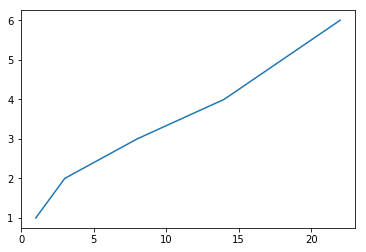

In [3]:
plt.plot([1, 3, 8, 14, 18, 22],[1, 2, 3, 4,5,6])
plt.show;

## Let's plot a real dataset

### Read our dataset

In [4]:
sales = pd.read_csv('vgsales.csv')
sales.shape
sales.head()

(16598, 11)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

### Get values for x and y axis

In [5]:
rank = sales.Rank[0:10]
gsales = sales.Global_Sales[0:10]

### Plot Game Rank and Game Global Sales for top ten game titles

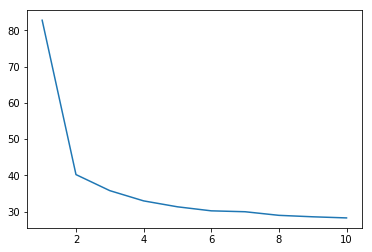

In [6]:
plt.plot(rank,gsales)
plt.show;

## Changing the plot properties

### Add labels to x and y axis

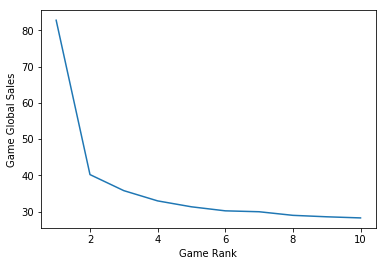

In [7]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.show;

### Add a title to the plot

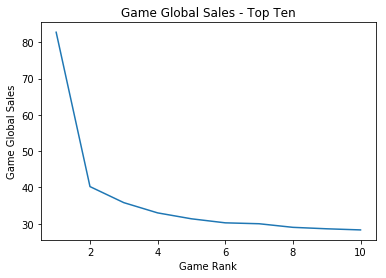

In [8]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.show;

### Add a legend

In [9]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

### Changing line properties

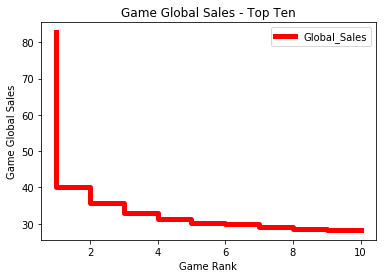

In [10]:
plt.plot(rank,gsales, color='red', linewidth=5, linestyle='steps')
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

### Modifying plot display area

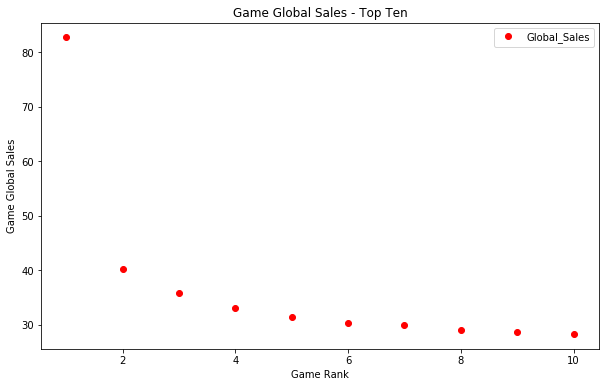

In [11]:
plt.figure(figsize=(10,6))
plt.plot(rank,gsales, 'ro')
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

# Demo End

# Drawing Bar plots - Demo

## The Dataset

In [24]:
sales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## A basic bar plot

### Prepare the data - Sales by Year

In [25]:
yearly_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Year"] )['Global_Sales'].
                             sum()}).reset_index().set_index(['Year'])
yearly_sales.head()

total_global_sales
Year                      
1980.0               11.38
1981.0               35.77
1982.0               28.86
1983.0               16.79
1984.0               50.36

### Plot the bar plot

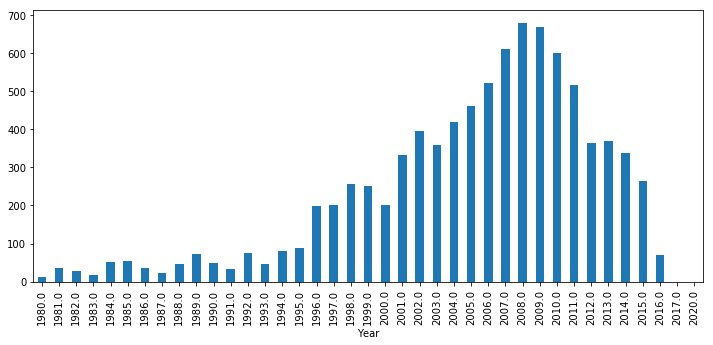

In [26]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar');

## Let's Customize our bar plot

### Change the color of the bars

In [27]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000');

### Add a title and axis labels

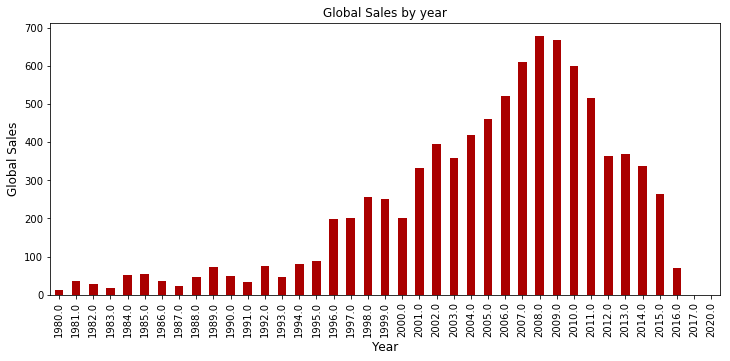

In [28]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000',
                                             title='Global Sales by year');
chart.set_xlabel("Year", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

## Applying same template to other columns

### Sales by Platform - Data

In [29]:
platform_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Platform"] )['Global_Sales'].
                               sum()}).reset_index().set_index(['Platform'])
platform_sales.head()

total_global_sales
Platform                    
2600                   97.08
3DO                     0.10
3DS                   247.46
DC                     15.97
DS                    822.49

### Sales by Platform - Bar plot

In [30]:
plt.figure(figsize=(12,5));
chart = platform_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

### Let's sort it

In [31]:
platform_sales_sorted = platform_sales.sort_values('total_global_sales', ascending=False)
plt.figure(figsize=(12,5));
chart = platform_sales_sorted.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

## Making a stacked bar plot

### Data - Regional sales, grouped by Genre 

In [32]:
genre = sales[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()
genre

Genre  NA_Sales  EU_Sales  JP_Sales
0         Action    877.83    525.00    159.95
1      Adventure    105.80     64.13     52.07
2       Fighting    223.59    101.32     87.35
3           Misc    410.24    215.98    107.76
4       Platform    447.05    201.63    130.77
5         Puzzle    123.78     50.78     57.31
6         Racing    359.42    238.39     56.69
7   Role-Playing    327.28    188.06    352.31
8        Shooter    582.60    313.27     38.28
9     Simulation    183.31    113.38     63.70
10        Sports    683.35    376.85    135.37
11      Strategy     68.70     45.34     49.46

### Drawing the stacked plot

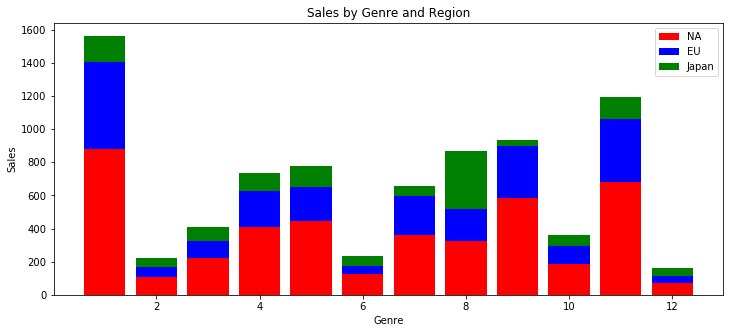

In [33]:
f, ax = plt.subplots(1, figsize=(12,5))
bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_l, genre['NA_Sales'], label='NA', color='red')
ax.bar(bar_l, genre['EU_Sales'], bottom=genre['NA_Sales'], label='EU',color='blue')
ax.bar(bar_l, genre['JP_Sales'], bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])], label='Japan',color='green')
ax.set_title("Sales by Genre and Region")
ax.set_xlabel("Genre");
ax.set_ylabel("Sales");
plt.legend(loc='upper right');

# Demo End

# Making histograms - Demo

## Recall our dataset

In [34]:
sales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

## Encode a categorical column for plotting

In [35]:
sales['Genre'].unique()
sales['genre_enc'] = pd.factorize(sales['Genre'])[0]
sales['genre_enc'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## Making a basic histogram plot

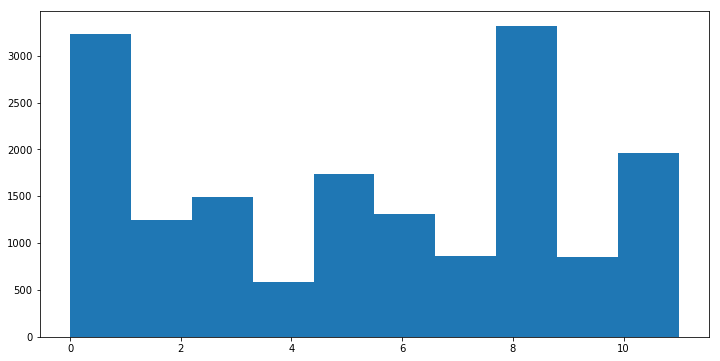

In [36]:
plt.figure(figsize=(12,6))
plt.hist(sales.genre_enc);

### Let's customize 

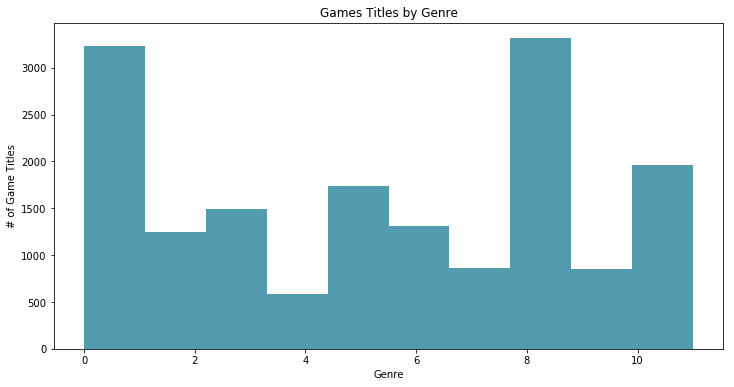

In [37]:
plt.figure(figsize=(12,6));
plt.hist(sales.genre_enc, color = '#539caf');
plt.title("Games Titles by Genre");
plt.xlabel("Genre");
plt.ylabel("# of Game Titles");
plt.show();

### Making subplots

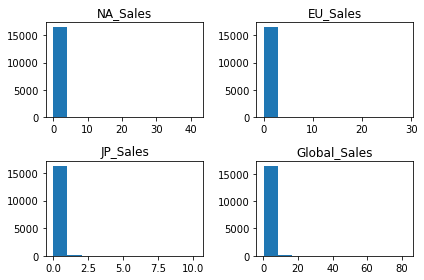

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.hist(sales["NA_Sales"])
ax0.set_title('NA_Sales')
ax1.hist(sales["EU_Sales"])
ax1.set_title('EU_Sales')
ax2.hist(sales["JP_Sales"])
ax2.set_title('JP_Sales')
ax3.hist(sales["Global_Sales"])
ax3.set_title('Global_Sales')
plt.tight_layout()
plt.show();

# Demo End

# Drawing box plots - Demo

## Dataset

In [39]:
sales.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  genre_enc  
0     41.49     29.02      3.77         8.46         82.74          0  
1     29.08      3.58      6.81         0.77         40.24          1  
2     15.85     12.88      3.79         3.31         35.82          2  
3     15.75     11.01      3.28         2.96         33.00          0  
4     11.27      8.89     10.22         1.00         31.37          3

## Let's make a Box plot

#### Sales by Region

In [40]:
sales_by_region = [sales[:100]['NA_Sales'], sales[:100]['EU_Sales'], sales[:100]['JP_Sales'], sales[:100]['Global_Sales']]
sales_by_region

[0     41.49
 1     29.08
 2     15.85
 3     15.75
 4     11.27
 5     23.20
 6     11.38
 7     14.03
 8     14.59
 9     26.93
 10     9.07
 11     9.81
 12     9.00
 13     8.94
 14     9.09
 15    14.97
 16     7.01
 17     9.43
 18    12.78
 19     4.75
 20     6.42
 21    10.83
 22     9.54
 23     9.63
 24     8.41
 25     6.06
 26     5.57
 27     3.44
 28     6.85
 29     9.03
       ...  
 70     5.91
 71     4.36
 72     5.58
 73     2.01
 74     4.46
 75     5.03
 76     3.54
 77     1.11
 78     1.79
 79     6.82
 80     3.81
 81     2.91
 82     1.06
 83     0.98
 84     5.80
 85     2.58
 86     2.91
 87     2.28
 88     2.82
 89     7.28
 90     2.90
 91     3.66
 92     2.93
 93     2.80
 94     4.10
 95     3.78
 96     5.39
 97     3.24
 98     4.79
 99     4.46
 Name: NA_Sales, Length: 100, dtype: float64, 0     29.02
 1      3.58
 2     12.88
 3     11.01
 4      8.89
 5      2.26
 6      9.23
 7      9.20
 8      7.06
 9      0.63
 10    11.00
 11     7.57
 12   

In [41]:
plt.figure(1, figsize=(12, 6))
plt.boxplot(sales_by_region)
plt.show;

# Demo End

# Drawing some other kinds of plots with matplotlib - Demo

## Scatter plots

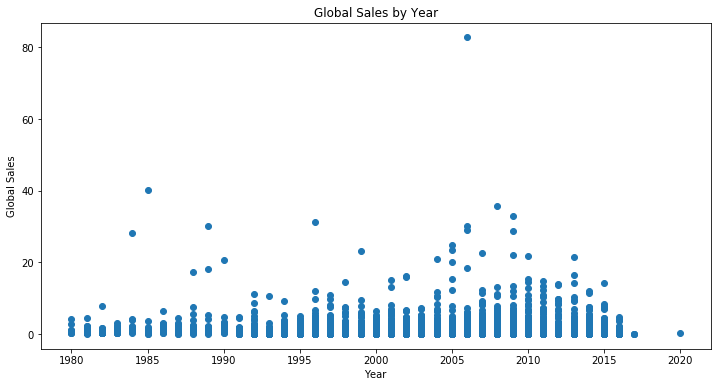

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(sales.Year, sales.Global_Sales)
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show();

## Pie charts

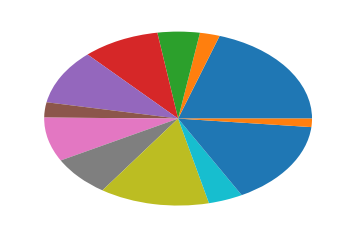

In [46]:
genre['NA_Sales']
plt.pie(genre['NA_Sales'])
plt.show();

### Saving the plot

In [47]:
plt.savefig("foo.png")

# Demo End